<a href="https://colab.research.google.com/github/Lynneice/DS-Assignment-Submission-Practice-Repository/blob/master/Ullman_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
from fbprophet import Prophet
import datetime
import numpy as np
import matplotlib as plt
import plotly 

In [101]:
#read in dataframe as csv
df = pd.read_csv("/ullmandata.csv", index_col=None, names=["ds", "y"], skiprows=1) 
df.head()

,ds,y
0,04/11/2017,0.00
1,04/17/2017,37.06
2,04/19/2017,24.66
3,04/11/2017,86.52
4,04/05/2017,6.42


In [102]:
#convert date to proper format
df["ds"] = pd.to_datetime(df["ds"])
df.head()



,ds,y
0,2017-04-11,0.00
1,2017-04-17,37.06
2,2017-04-19,24.66
3,2017-04-11,86.52
4,2017-04-05,6.42


In [103]:
df["y"] = pd.to_numeric(df["y"], errors='coerce')
df.head()

,ds,y
0,2017-04-11,0.00
1,2017-04-17,37.06
2,2017-04-19,24.66
3,2017-04-11,86.52
4,2017-04-05,6.42


In [104]:
m = Prophet()
df.loc[(df['ds'] < '2016-01-01'), 'y'] = None
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [114]:
#select prediciton period
future = m.make_future_dataframe(periods=12, freq='D', include_history=True)
future.tail()

,ds
1107,2021-12-25
1108,2021-12-26
1109,2021-12-27
1110,2021-12-28
1111,2021-12-29


In [117]:
#predict the future
#pass future dataframe as parmeters for forecast model
forecast = m.predict(future)
forecast.loc[(forecast['ds'] < '2007-01-01')] = None
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(25)
forecast = forecast.dropna(axis=0, how='any')
forecast.head(25)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8,2017-01-05,280.310225,-106.917284,583.175931,280.310225,280.310225,-30.580730,-30.580730,-30.580730,-42.503433,-42.503433,-42.503433,11.922704,11.922704,11.922704,0.0,0.0,0.0,249.729495
9,2017-01-23,280.749895,-113.840152,571.449921,280.749895,280.749895,-46.153676,-46.153676,-46.153676,-41.207892,-41.207892,-41.207892,-4.945783,-4.945783,-4.945783,0.0,0.0,0.0,234.596219
10,2017-01-30,280.920878,-107.856705,585.273715,280.920878,280.920878,-56.866444,-56.866444,-56.866444,-41.207892,-41.207892,-41.207892,-15.658552,-15.658552,-15.658552,0.0,0.0,0.0,224.054434
11,2017-02-10,281.189566,-45.590748,626.535893,281.189566,281.189566,-5.941875,-5.941875,-5.941875,0.149034,0.149034,0.149034,-6.090909,-6.090909,-6.090909,0.0,0.0,0.0,275.247691
12,2017-02-20,281.433827,-102.763016,570.481298,281.433827,281.433827,-31.711434,-31.711434,-31.711434,-41.207892,-41.207892,-41.207892,9.496458,9.496458,9.496458,0.0,0.0,0.0,249.722393
13,2017-02-23,281.507105,-63.255212,587.433448,281.507105,281.507105,-31.749540,-31.749540,-31.749540,-42.503433,-42.503433,-42.503433,10.753893,10.753893,10.753893,0.0,0.0,0.0,249.757565
14,2017-02-27,281.604810,-97.022013,591.555643,281.604810,281.604810,-31.523122,-31.523122,-31.523122,-41.207892,-41.207892,-41.207892,9.684770,9.684770,9.684770,0.0,0.0,0.0,250.081688
15,2017-02-28,281.629236,-52.583849,592.675896,281.629236,281.629236,-19.136212,-19.136212,-19.136212,-28.187659,-28.187659,-28.187659,9.051447,9.051447,9.051447,0.0,0.0,0.0,262.493024
16,2017-03-01,281.653662,-75.340687,605.818808,281.653662,281.653662,-19.389092,-19.389092,-19.389092,-27.712923,-27.712923,-27.712923,8.323831,8.323831,8.323831,0.0,0.0,0.0,262.264570
17,2017-03-03,281.702515,-18.512774,624.037878,281.702515,281.702515,6.851807,6.851807,6.851807,0.149034,0.149034,0.149034,6.702773,6.702773,6.702773,0.0,0.0,0.0,288.554322


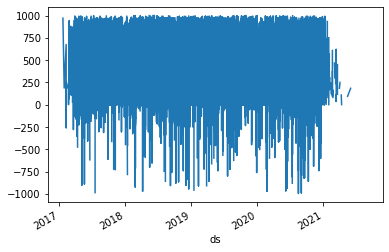

In [118]:
df.set_index('ds').y.plot()

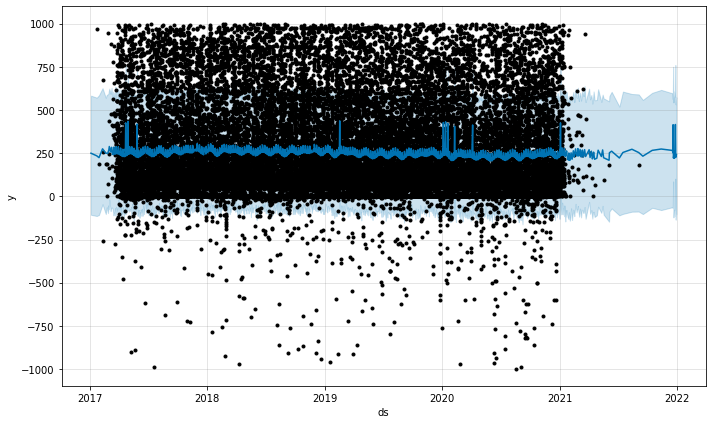

In [119]:
fig1 = m.plot(forecast)

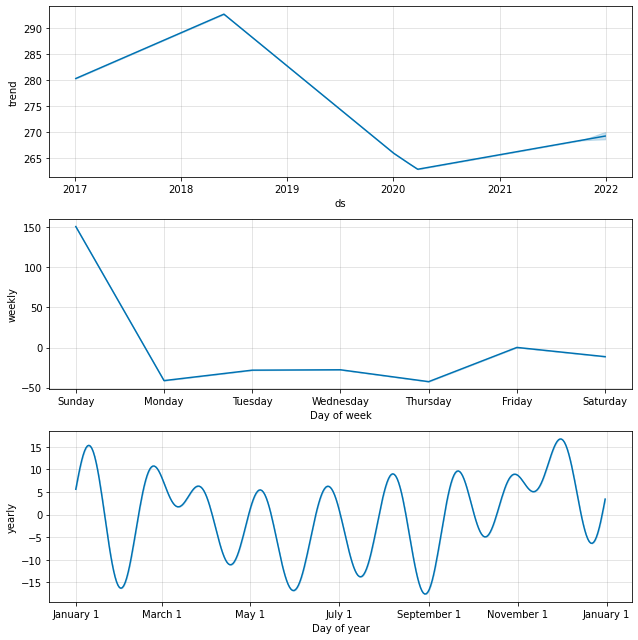

In [120]:
fig2 = m.plot_components(forecast)

In [121]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [122]:
plot_components_plotly(m, forecast)
